# Exploratory data analytics of the Iris Flower Dataset


**Objective:** To be able to classify a new iris flower into one of the three classes of the iris flower and to analyse the dataset and obtain distinguishing features for each of the classes


In [124]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
#setting the working file
import os
os.chdir('D:\mini_task_1')

#read the csv file containing the iris flower dataset into a pandas data frame
iris=pd.read_csv('iris_csv.csv')

# Understanding the Iris dataset

In [2]:
#find the dimensions of the dataset and the number of data points 
iris.shape

(150, 5)

In [3]:
#print the column headings of the dataset
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

**Observations:-**

1.The first four columns are the features based on which the flowers are classified into classes

2.There are 150 data points in the dataset

3.There are five features for each data point

**Dataset description**

In [4]:
#display the first five data points along with the column headers of the datset
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#print the basic information of the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**Observations:-**

1.There is no missing data in this datset

2.All the datapoints are in float

In [6]:
#count the number of classes in the dataset and further, the number of datapoints under each class
iris["class"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

**Observation:-**
This is a balanced dataset- All three classes of Iris flowers have equal number of data points 

In [7]:
#Obtain the basic statistical information of the dataset
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observation:-**
This table helps us understand the range of values in each of the feature but doesn't really help us distinguish the three classes

To further understand how the iris flower is classified into the three classes, dividing table into three categories in accordance to the classes

In [8]:
#diving the dataset into three groups(each as a smaller dataset)

grouped=iris.groupby('class')
setosa=grouped.get_group("Iris-setosa")
versicolor=grouped.get_group("Iris-versicolor")
virginica=grouped.get_group("Iris-virginica")

#each of these smaller datasets contain 50 datapoints each

## Visualising the Dataset
To get a further clear understanding of the dataset using 

1.Univariate Analysis

2.Bivariate Analysis

3.Multivariate Analysis

**Scatter Plots**

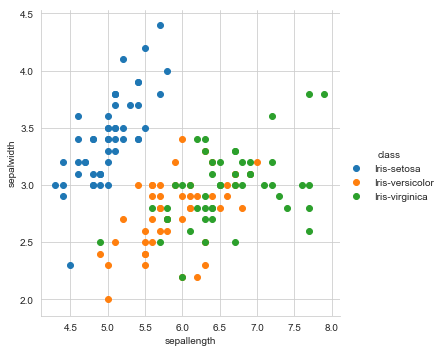

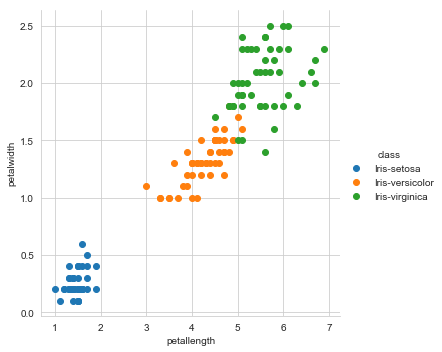

In [9]:
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue= 'class', height= 5)\
   .map(plt.scatter, 'sepallength', 'sepalwidth')\
   .add_legend();
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue= 'class', height= 5)\
   .map(plt.scatter, 'petallength', 'petalwidth')\
   .add_legend();
plt.show()

**Observations:-**

1.On the basis of both plots, the iris-setosa flowers can be easily distinguished from the iris-virginica and iris-versicoor flowers

2.These plots do not give the entire picture since there are four features 

**Understanding the three classes - setosa, virginica, versicolor**

**Pair Plots** 

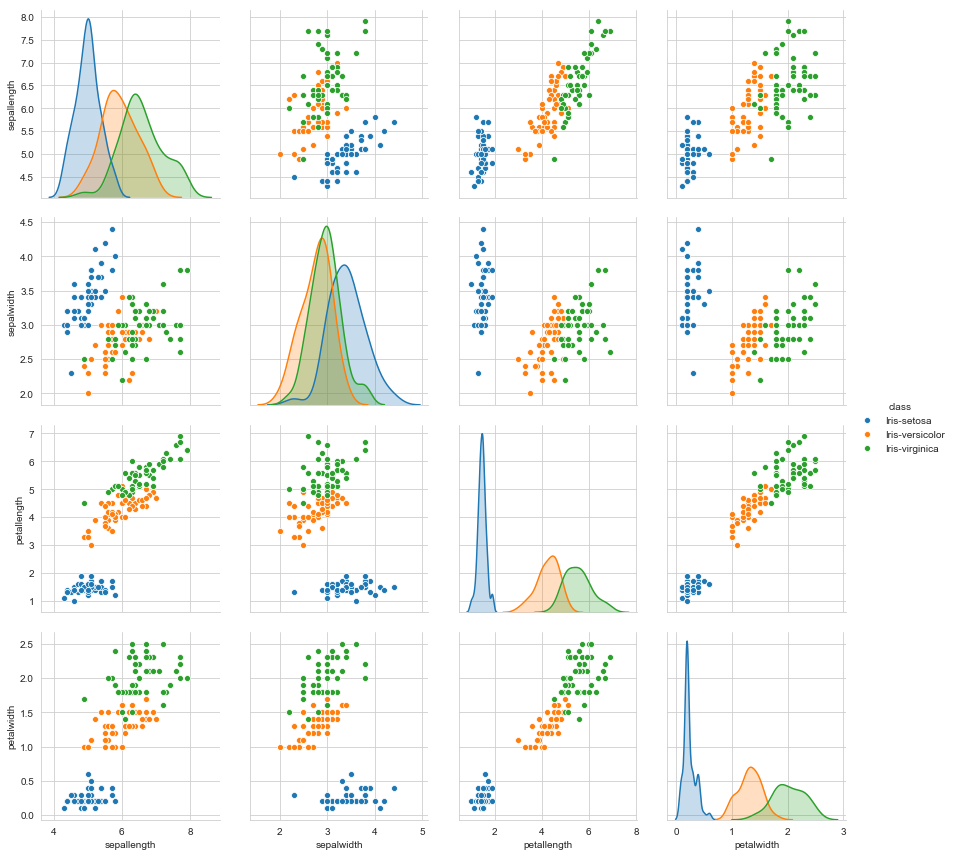

In [10]:
#print pair plots for the dataset with class as basis using seaborn
sns.set_style("whitegrid")
sns.pairplot(iris,hue="class",height=3)
plt.show()

**Observations:-** 

1.These plots help us differentiate iris-setosa from the other two classes on the basis of sepal length, sepal width, petal length and petal width 

2.The petal length and petal width are more useful in differentiating the setosa flowers than the sepal width and sepal length

3.The diagnol plots in this matrix of pair plots give us the Pdf plots of these features

4.A simple condition based on petal width and length is enough to seperate the iris-setosa flowers 

**Histogram Plots**


The pair plots helped us differentiate only setosa flowers hence we need to plot the histograms of each of these features to get a further clear picture about the density of the each class and their distribution 

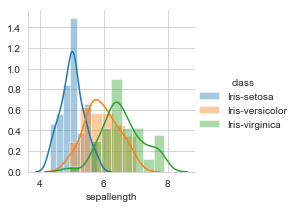

In [11]:
#Print the Histogram of sepal length
sns.FacetGrid(iris,hue="class",height=3).map(sns.distplot,"sepallength").add_legend()
plt.show()

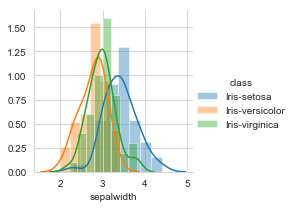

In [12]:
#Print the Histogram of sepal width
sns.FacetGrid(iris,hue="class",height=3).map(sns.distplot,"sepalwidth").add_legend()
plt.show()

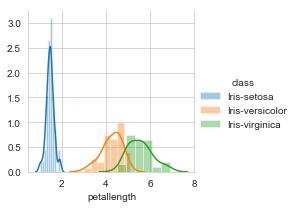

In [13]:
#Print the Histogram of petal length
sns.FacetGrid(iris,hue="class",height=3).map(sns.distplot,"petallength").add_legend()
plt.show()

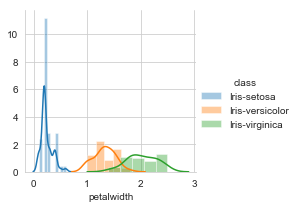

In [14]:
#Print the Histogram of petal width
sns.FacetGrid(iris,hue="class",height=3).map(sns.distplot,"petalwidth").add_legend()
plt.show()

**Observations:-**

1.These histograms give the Pdf of the classes as a smooth curve

2.The sepal length and sepal width plots have several overlappings 

3.The iris-setosa can be clearly distinguished from the other two classes in accordance to their petal length and petal width

4.The petal length plot doesn't have any overlapping for setosa flowers-hence, petal length is the better feature for distinguishing the three classes

5.If petal length of flowers is less than 2 cm then the flower can be undeniably classified as iris-setosa

The above plots have helped us differentiate the setosa flowers but to get a much clearer picture about the other two classes we need to understand what those plots mean in terms of numbers



**Computing PDF and CDF**

**PDF::** Probablity Density Function is the probablity that the variable takes a particular value.

**CDF:** Cumulative Density function is the cummulative summation of the probablity density function for that variable

Plotting the Pdf and Cdf with respect to Petal length:- differentiate the three classes and also find the accuracy of our classifications

iris-setosa:
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
iris-versicolor:
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
iris-virginica:
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


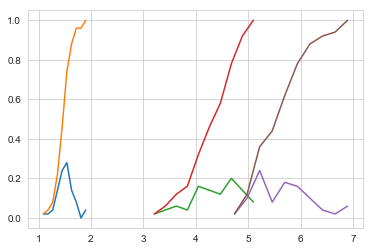

In [15]:
#iris-setosa
#Calculating the pdf of petal lengths of setosa flowers
counts, bin_edges=np.histogram(setosa["petallength"],bins=10, density =True)
pdf=counts/sum(counts)

#printing the Pdf values as compared to the actual edges of the histogram at that point
print('iris-setosa:')
print(pdf)
print(bin_edges)

#Calculating the cdf of petal lengths of setosa flowers
cdf=np.cumsum(pdf)

#plotting pdf and cdf 
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#iris-versicolor 
#Calculating the pdf of petal lengths of versicolor flowers
counts, bin_edges=np.histogram(versicolor["petallength"],bins=10, density =True)
pdf=counts/sum(counts)

#printing the Pdf values as compared to the actual edges of the histogram at that point
print('iris-versicolor:')
print(pdf)
print(bin_edges)

#Calculating the cdf of petal lengths of versicolor flowers
cdf=np.cumsum(pdf)

#plotting pdf and cdf 
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#iris-virginica 
#Calculating the pdf of virginica flowers
counts, bin_edges=np.histogram(virginica["petallength"],bins=10, density =True)
pdf=counts/sum(counts)

#printing the Pdf values as compared to the actual edges of the histogram at that point
print('iris-virginica:')
print(pdf)
print(bin_edges)

#Calculating the cdf of petal lengths of virginica flowers
cdf=np.cumsum(pdf)

#plotting pdf and cdf 
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)



plt.show()

**Observations:-**

1.There is a small overlap between versicolor and virginica flowers between 4.5 and 5.2 

2.When the pdf of setosa flowers is 2, the cdf value is 1 and there is no overlapping for setosa flowers

3.At length of 5cm versicolor cdf is at 0.95(approximately)

4.At length of 5cm virginica cdf is at 0.10(approximately)

**Inferences:-**
From above plot we can say that:

1.The petal length of all the Iris-Setosa Flowers lie between 1cm and 2cm with 100% accuracy

2.The petal length of all the Iris-Versicolor Flowers lie between 2cm and 5cm with 95% accuracy and 5% error

3.The petal length of all the Iris-Virginica Flowers lie between 5cm and 7cm with 90% accuracy and 10% error.



**1-D Scatter plot**

To see how the three classes vary with petal length in 1-D

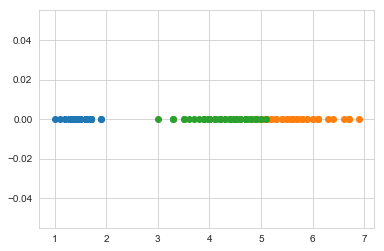

In [16]:
# 1-D scatter plot
plt.plot(setosa["petallength"],np.zeros_like(setosa["petallength"]),'o')
plt.plot(virginica["petallength"],np.zeros_like(virginica["petallength"]),'o')
plt.plot(versicolor["petallength"],np.zeros_like(versicolor["petallength"]),'o')
plt.show()

**Observations:-**
from the plot we can understand that again setosa flowers are distinctively seperate from virginica and versicolor
but at around 5 there is small difference in virginica and versicolor

**Statistical Data Analysis of the Dataset**

To understand the classes better let us discuss the characteristics of the petal length of the three classes in numbers

To find:

1.**Mean**- the average of the datapoints 

2.**Standard Deviation**- along with the mean will help us understand the range of the datapoints of petal lengths

3.**Median**- help us understand the mid value of the datapoints of the petal lengths

4.**Quartiles**- this divides the datapoints into four groups furtgher helping us understand the divisions in the datapoints

5.**90thPercentiles**- the value of 90% of the datapoints


In [17]:
#find the Means of each of the classes for their respective petal lengths 
print('Petal Length:')
print('\nMeans:')
print(np.mean(setosa["petallength"]))
print(np.mean(versicolor["petallength"]))
print(np.mean(virginica["petallength"]))

#find the Standard Deviation from mean 
print('\nStandard Deviations:')
print(np.std(setosa["petallength"]))
print(np.std(versicolor["petallength"]))
print(np.std(virginica["petallength"]))

#find the Median 
print('\nMedians:')
print(np.median(setosa["petallength"]))
print(np.median(versicolor["petallength"]))
print(np.median(virginica["petallength"]))

#find Quartiles 
print('\nQuartiles:')
print(np.percentile(setosa["petallength"],np.arange(0, 100, 25)))
print(np.percentile(versicolor["petallength"],np.arange(0, 100, 25)))
print(np.percentile(virginica["petallength"],np.arange(0, 100, 25)))

#find 90thPercentiles
print('\n90thPercentiles:')
print(np.percentile(setosa["petallength"],90))
print(np.percentile(versicolor["petallength"],90))
print(np.percentile(virginica["petallength"],90))

Petal Length:

Means:
1.464
4.26
5.552

Standard Deviations:
0.17176728442867115
0.4651881339845204
0.5463478745268441

Medians:
1.5
4.35
5.55

Quartiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90thPercentiles:
1.7
4.8
6.3100000000000005


**Inferences:-**
(approximation)

1.Setosa-

    a)Starting value is 1.0
    b)Range is between 1.0 and 2.0 
    c)Mid-point-1.5    
    d)90% of values below 1.7

2.Versicolor- 

    a)Starting value is 3.0   
    b)Range is between 3.0 and 5.0    
    c)Mid-point - 4.35    
    d)90% of values below 4.8
    

3.Virginica-

    a)Starting value is 4.5    
    b)Range is between 5.0 and 6.5   
    c)Moid-point - 5.55    
    d)90% of values below 6.31

**Box Plots with Whiskers**

A box plot gives us an understanding about how the values are spread in the dataset. It helps us view the datas in terms of the quartiles and edges.
The height of the boxes represent the datapoints between the 25th(Q1) and 75th(Q3) percentile and the whiskers represent (Q1-1.5*IQR) and (Q3+1.5*IQR)
where IQR (Inter Quartile Range)=Q3-Q1

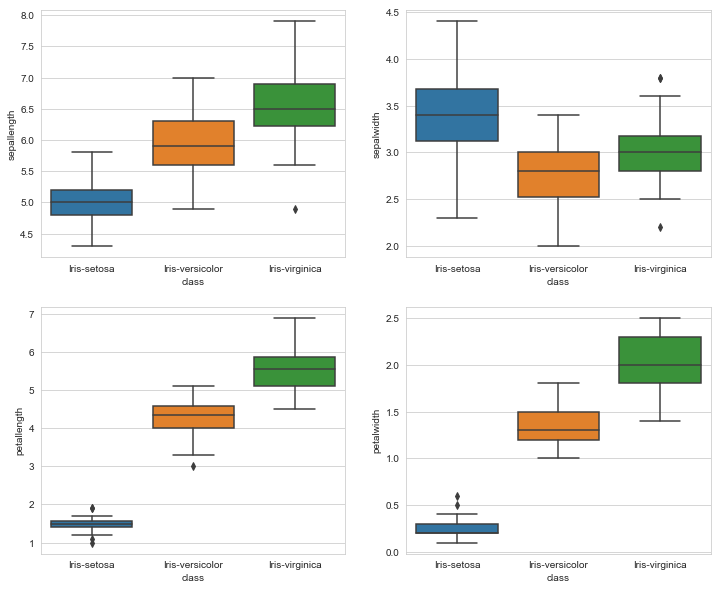

In [18]:
#Box plots and whiskers -- to view the pdf in sideways and further understand the distinction in three classes of iris flowers
#box plots and whiskers of all four features in the dataset
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='class', y='sepallength',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='class', y='sepalwidth',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='class', y='petallength',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='class', y='petalwidth',data=iris)
plt.show()

**Observations:-**
The petal length and petal width plots are once again more widespread.


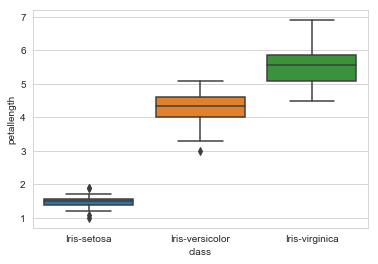

In [19]:
#box plots and whiskers of the petal length
sns.boxplot(x='class', y='petallength',data=iris)
plt.show()

**Violin plots**

Violin plots combine the benefits of the box plots and pdf graph. 
The density of the data can be identified by the thickness of the plot- the denser areas are thicker and sparser areas are thinner
The middle shows a simple representation of the Box plots with a white dot representing median 

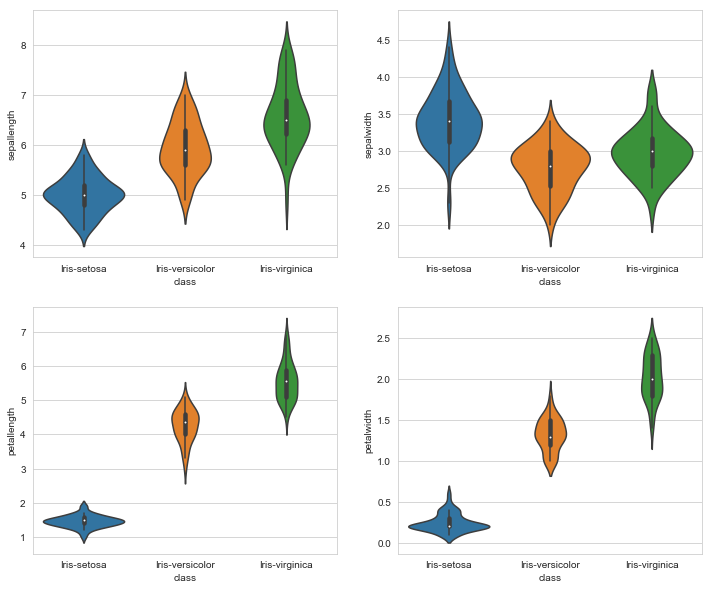

In [20]:
#violin plots of all four features in the dataset
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='sepallength',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='sepalwidth',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='petallength',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='petalwidth',data=iris)

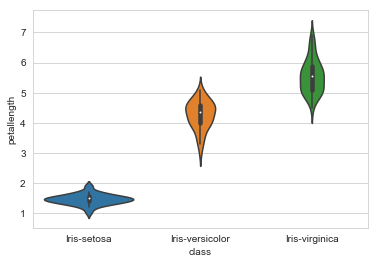

In [21]:
#violin plot of the petal length
sns.violinplot(x="class", y="petallength",data=iris)
plt.show()

**Train and Test split**

In [196]:
x=iris.iloc[:,0:4]
y=iris.iloc[:,4:5]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=7)

In [197]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105, 1), (45, 1))

In [198]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Decision Tree Classifier**

In [199]:
classifier= DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
y_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n",y_accuracy)
print( classification_report(y_test, y_pred) )
print(cm)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor']

 0.8666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.78      0.88      0.82        16
 Iris-virginica       0.87      0.76      0.81 

**Logistic Regression**


In [200]:
classifier= LogisticRegression(solver='lbfgs',multi_class='auto')
classifier.fit(x_train, y_train.values.ravel())
y_pred=classifier.predict(x_test)
y_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n",y_accuracy)
print( classification_report(y_test, y_pred) )
print(cm)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor']

 0.9111111111111111
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88        16
 Iris-virginica       0.88      0.88      0.88   

**K Nearest Neighbors**

In [201]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train.values.ravel())
y_pred=classifier.predict(x_test)
y_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n", y_accuracy)
print( classification_report(y_test, y_pred) )
print(cm)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor']

 0.9111111111111111
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      1.00      0.89        16
 Iris-virginica       1.00      0.76      0.8

**Support Vector Machine**

In [202]:
classifier= SVC(kernel='linear', random_state=7)
classifier.fit(x_train, y_train.values.ravel())
y_pred= classifier.predict(x_test)
y_accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n", y_accuracy)
print(classification_report(y_test,y_pred))
print(cm)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor']

 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      0.88      0.90        16
 Iris-virginica       0.89      0.94      0.91    

**Gaussian Naive Bayes**


In [203]:
classifier=GaussianNB()
classifier.fit(x_train,y_train.values.ravel())
y_pred=classifier.predict(x_test)
y_accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(y_pred)
print("\n", y_accuracy)
print(classification_report(y_test,y_pred))
print(cm)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor']

 0.8888888888888888
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      0.81      0.84        16
 Iris-virginica       0.83      0.88      0.86    

**Model Selection**

In [204]:
models=[('LR', LogisticRegression(solver='lbfgs',multi_class='auto')),('LDA', LinearDiscriminantAnalysis()),('KNN', KNeighborsClassifier()),
       ('CART', DecisionTreeClassifier()),('NB', GaussianNB()),('SVM', SVC(gamma='auto'))]
names=[]
results=[]
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, x_train, y_train.values.ravel() , cv=kfold, scoring='accuracy',error_score='raise' )
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.970909 (0.063089)
LDA: 0.980000 (0.040000)
KNN: 0.940909 (0.065839)
CART: 0.950909 (0.066457)
NB: 0.980909 (0.038236)
SVM: 0.970909 (0.044499)


**Gaussian Naive Bayes** model  has the most accuracy out of all the models.